<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#One-way-ANOVA-using-scipy" data-toc-modified-id="One-way-ANOVA-using-scipy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>One-way ANOVA using scipy</a></span></li><li><span><a href="#Describe-using-module-researchpy" data-toc-modified-id="Describe-using-module-researchpy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Describe using module researchpy</a></span><ul class="toc-item"><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Interpretation</a></span></li></ul></li><li><span><a href="#One-way-ANOVA-using-statsmodels" data-toc-modified-id="One-way-ANOVA-using-statsmodels-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>One-way ANOVA using statsmodels</a></span></li><li><span><a href="#Find-effect-size" data-toc-modified-id="Find-effect-size-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Find effect size</a></span></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Assumptions-Check" data-toc-modified-id="Assumptions-Check-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Assumptions Check</a></span><ul class="toc-item"><li><span><a href="#INDEPENDENCE" data-toc-modified-id="INDEPENDENCE-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>INDEPENDENCE</a></span></li><li><span><a href="#NORMALITY" data-toc-modified-id="NORMALITY-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>NORMALITY</a></span></li></ul></li><li><span><a href="#HOMOGENEITY-OF-VARIANCE" data-toc-modified-id="HOMOGENEITY-OF-VARIANCE-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>HOMOGENEITY OF VARIANCE</a></span></li><li><span><a href="#POST-HOC-TESTING" data-toc-modified-id="POST-HOC-TESTING-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>POST-HOC TESTING</a></span><ul class="toc-item"><li><span><a href="#Tukey-Honestly-Significant-Difference-(HSD)" data-toc-modified-id="Tukey-Honestly-Significant-Difference-(HSD)-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Tukey Honestly Significant Difference (HSD)</a></span></li><li><span><a href="#Bonferroni" data-toc-modified-id="Bonferroni-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Bonferroni</a></span></li></ul></li><li><span><a href="#Šidák-(a.k.a.-Dunn-Šidák)" data-toc-modified-id="Šidák-(a.k.a.-Dunn-Šidák)-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Šidák (a.k.a. Dunn-Šidák)</a></span></li><li><span><a href="#TUKEY-HONESTLY-SIGNIFICANT-DIFFERENCE-(HSD)" data-toc-modified-id="TUKEY-HONESTLY-SIGNIFICANT-DIFFERENCE-(HSD)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)</a></span></li><li><span><a href="#BONFERRONI-CORRECTION" data-toc-modified-id="BONFERRONI-CORRECTION-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>BONFERRONI CORRECTION</a></span></li><li><span><a href="#ŠIDÁK-CORRECTION-(A.K.A.-DUNN-ŠIDÁK-CORRECTION)" data-toc-modified-id="ŠIDÁK-CORRECTION-(A.K.A.-DUNN-ŠIDÁK-CORRECTION)-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>ŠIDÁK CORRECTION (A.K.A. DUNN-ŠIDÁK CORRECTION)</a></span></li><li><span><a href="#REFERENCES" data-toc-modified-id="REFERENCES-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>REFERENCES</a></span></li></ul></div>

# Import modules

- https://www.pythonfordatascience.org/anova-python/

In [1]:
import numpy as np
import pandas as pd
import os,sys,time

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.robust as smrb # smrb.mad() etc
import patsy # y,X1 = patsy.dmatrices(formula, df, return_type='dataframe')

In [5]:
ifile = "https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv"
ifile = "data/difficile.csv"
df = pd.read_csv(ifile)
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
print(df.shape)

df.head(2).append(df.tail(2))

(15, 2)


,dose,libido
0,placebo,3
1,placebo,2
13,high,3
14,high,6


# One-way ANOVA using scipy

In [6]:
import scipy.stats as stats

stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

In [7]:
df.groupby('dose').describe()

libido                                        
         count mean       std  min  25%  50%  75%  max
dose                                                  
high       5.0  5.0  1.581139  3.0  4.0  5.0  6.0  7.0
low        5.0  3.2  1.303840  2.0  2.0  3.0  4.0  5.0
placebo    5.0  2.2  1.303840  1.0  1.0  2.0  3.0  4.0

# Describe using module researchpy

In [14]:
import researchpy as rp

rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.4667,1.7674,0.4563,2.4879,4.4454


In [15]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.5811,0.7071,3.0368,6.9632
low,5,3.2,1.3038,0.5831,1.5811,4.8189
placebo,5,2.2,1.3038,0.5831,0.5811,3.8189


## Interpretation

A new medication was developed to increase the libido of those who take the medication. The purpose of this study was to test for a difference between the dosage levels.

There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247.

# One-way ANOVA using statsmodels

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


# Find effect size
This table provides all the information one needs in order to interprete if the results are significant; however, it does not provide any effect size measures to tell if the statistical significance is meaningful.

The function below calculates eta-squared (η^2) and omega-squared (ω^2).

A quick note, η^2 is the exact same thing as R^2 except when coming from the ANOVA framework people call it η^2.


ω^2 is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [10]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


# Interpretation

A new medication was developed to increase libido. The purpose of this study was to test for a difference between the dosage levels. 


There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247, with an overall large effect, 
ω
2
= 0.35. 

In order to tell which groups differed significantly, post-hoc tests need to be conducted. Before one goes through that work, the assumptions should be checked first in case any modifications need to be made to the model.

# Assumptions Check

The assumptions in this section need to be met in order for the test results
to be considered valid. 
A more in-depth look at parametric assumptions is provided [here](https://www.pythonfordatascience.org/parametric-assumptions-python),
which includes some potential remedies.

## INDEPENDENCE

This assumption is tested when the study is designed. What this means is that all groups are mutually exclusive, i.e. an individual can only belong in one group. Also, this means that the data is not repeated measures (not collected through time). In this example, this condition is met.

## NORMALITY

The assumption of normality is tested on the residuals of the model
when coming from an ANOVA or regression framework.
One method for testing the assumption of normality is the Shapiro-Wilk test.
This can be completed using the [shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) method from scipy.stats. 
Ensure that scipy.stats is imported for the following method to work.
Unfortunately the output is not labelled, but it's (W-test statistic, p-value).

In [17]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.916691780090332, pvalue=0.1714704930782318)

The test is non-significant, W= 0.9167, p= 0.1715, which indicates that the residuals are normally distributed.

Another way to test the assumption is through a visual check- this is helpful when the sample is large. The reason this is true is that as the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases. 

One method of visually checking the distribution is to use a probability plot with or without the correlation value, 
R^2, to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the Gaussian (a.k.a the normal) distribution. This can be completed by using the [probplot()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) method from `scipy.stats`.
If using the R^2 measure, one can refer to the [NIST/SEMATECH e-handbook of statistical methods](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3676.htm) to see if the value is significant.

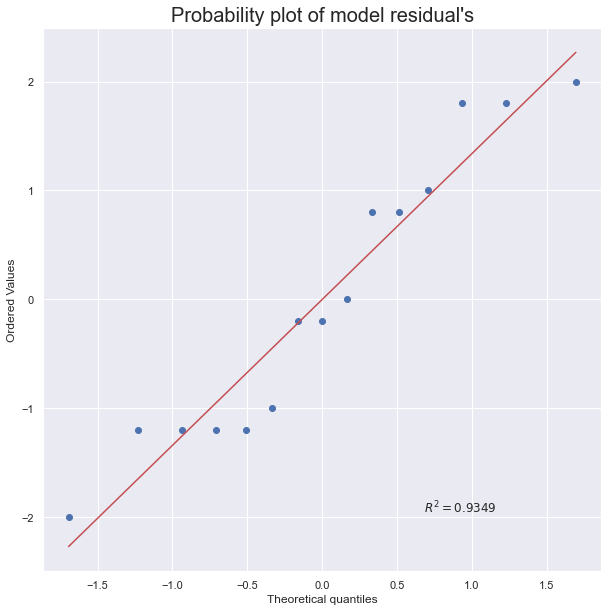

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

This is a case where the statistical testing method indicated the residuals were normally distributed, but the probability plot correlation coefficient (PPCC) indicated non-normality. Given the current example's sample size is small, N= 15, the Shapiro-Wilk test indicated normality, and that the calculated PPCC, `R^2 = 0.9349`, is ever so slightly smaller than the table PPC, `R^2 = 0.9376`, it is reasonable to state this assumption is met. However, looking at the plotted probability plot and the residual structure it would also be reasonable to transform the data for the analysis, or to use a non-parametric statistical test such as `Welch's ANOVA` or the K`ruskal-Wallis ANOVA`.

# HOMOGENEITY OF VARIANCE

The final assumption is that all groups have equal variances. One method for testing this assumption is the Levene's test of homogeneity of variances. This can be completed using the `levene()` method from `scipy.stats`.

In [19]:
stats.levene(df['libido'][df['dose'] == 'high'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

The Levene's test of homogeneity of variances is not significant which indicates that the groups have non-statistically significant difference in their varability. Again, it may be worthwhile to check this assumption visually as well.

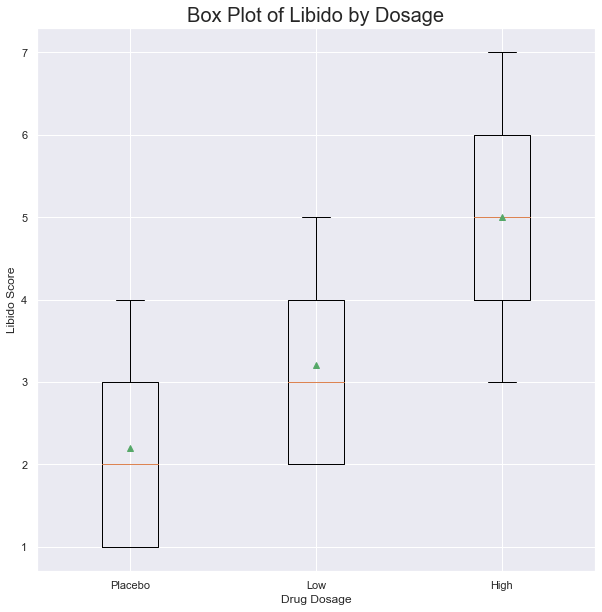

In [20]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [df['libido'][df['dose'] == 'placebo'],
        df['libido'][df['dose'] == 'low'],
        df['libido'][df['dose'] == 'high']]

ax.boxplot(data,
           labels= ['Placebo', 'Low', 'High'],
           showmeans= True)

plt.xlabel("Drug Dosage")
plt.ylabel("Libido Score")

plt.show()

The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have equal variance. 

By default box plots show the median (orange line in graph above). The green triangle is the mean for each group which was an additional argument that was passed into the method. 

There are different ways to handle heteroskedasticity (unequal variance) and a decision needs to be made. Some options include, but is not limited to, transformming the dependent variable (outcome), could use trimmed means, robust standard errors, or use a parametric test suchs as the Welch's t-test. For a more in-depth look at the assumptions and some potential remedies, please check out this [page](https://www.pythonfordatascience.org/parametric-assumptions-python).

# POST-HOC TESTING

By conducting post-hoc tests or planned comparisons it allows one to see which group(s) significantly differ from each other; remember that the ANOVA is an omnibus test! There are a few different approaches that can be taken while conducting these tests, ones that are implemented in StatsModels currently are:

## Tukey Honestly Significant Difference (HSD)
Tests all pairwise group comparisons while controlling for the multiple comparisons which protects the familywise error rate and from making a Type I error
Not technically a "post-hoc" test since this test can be used as a test independently of the ANOVA and can be planned before hand
More in-depth information about this statistical method can be found [here](https://methods.sagepub.com/reference/encyc-of-research-design/n478.xml)

## Bonferroni
- Tests groups for a diffence while controlling for the multiple comparisons which protects the familywise error rate and from making a Type I error. It should be noted that some statistical software reports the Bonferroni adjusted confidence interval, however this is not the case in Python at this time (unless one were to program a function to do so)
- This method is common because it is fast to calculate - take the number of groups to be compared and divide that by the initial alpha value
```
α_Bonf = Number of groups
         ------------------
                  α
```
In the current example there are 3 groups being compared (placebo vs. low, placebo vs. high, and low vs. high) which had `α = 0.05` making the equation become 
`α_Bonf = 3 / 0.05 = 0.0167`.

Thus, in order for a comparison to be considered significant a p-value would need to be < 0.0167 in order to be considered statistically significant.
- More in-depth information about this statistical method can be found [here](https://methods.sagepub.com/reference/encyc-of-research-design/n33.xml)

# Šidák (a.k.a. Dunn-Šidák)
- Tests groups for a diffence while controlling for the multiple comparisons which protects the familywise error rate and from making a Type I error. It should be noted that some statistical software reports the Šidák adjusted confidence interval, however this is not the case in StatsModels at this time (unless one were to program a function to do so)

- This method is common because it is pretty fast to calculate, the formula is 
```
α_Sid = 1 − (1−α)^(1/Number of groups)
```
In the current example there are 3 groups being compared (placebo vs. low, placebo vs. high, and low vs. high) which had `α = 0.05` making the equation become 
```
α_Sid = 1 − (1−0.05)^(1/3)
      = 0.0170
```
Thus, in order for a comparison to be considered significant a p-value would need to be < 0.0170 to be considered statistically significant.
- More in-depth information about this statistical method can be found [here](https://methods.sagepub.com/reference/the-sage-dictionary-of-statistics/n166.xml?fromsearch=true).


# TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)

Have to use a library that has not been imported yet; please see the [official documentation](http://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html) about this method for more information if interested.

In [21]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.8,0.1472,-4.1651,0.5651,False
high,placebo,-2.8,0.0209,-5.1651,-0.4349,True
low,placebo,-1.0,0.5171,-3.3651,1.3651,False


Now to make sense of the table.

- At the top the table testing information is provided
`FWER` is the familywise error rate, i.e. what 
α is being set to and controlled at
- `group1` and `group2` columns are the groups being compared
- `meandiff` is the difference between the group means
- `p-adj` is the corrected p-value which takes into account the multiple comparisons being conducted
- `lower` is the lower band of the confidence interval. In the current example the confidence interval at the 95% level since `α = 0.05`.
- `upper` is the upper band of the confidence interval. In the current example the confidence interval at the 95% level since `α = 0.05`.
- `reject` is the decision rule based on the corrected p-value


It is possible to plot the difference using this method as well!

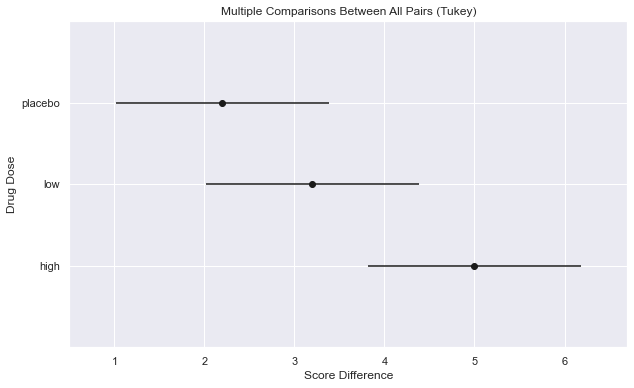

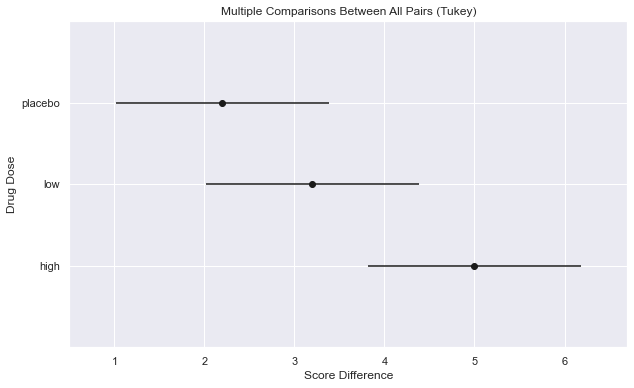

In [22]:
post_hoc_res.plot_simultaneous(ylabel= "Drug Dose", xlabel= "Score Difference")

Using Tukey HSD to test for differences between groups indicates that there is a statistically significant difference in libido score between those who took the placebo and those who took the high dosage of the medication, no other groups differed significantly. What this indicates is that the high dosage of the medication is effective at increasing libido, but the low dosage is not.

# BONFERRONI CORRECTION

Have to use a library that has not been imported yet (if you didn't do the Tukey HSD example above); please see the [official documentation](http://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html) about this method for more information if interested. 

The documentation for [allpairtest](http://www.statsmodels.org/devel/generated/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest.html#statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest) is not in the best shape at the time of writing this. The method returns 3 objects, one is a completed table object, the second is the data of the table, and the third is the data of the table with the table headings - it is not understood why the developers of StatsModels did this. All that is needed is the first object. 

Before jumping into the code, let's take a look at pseudo code to make sense of this method.

In [24]:
# allpairtest(statistical_test_method, method= "correction_method")

The documentation shows one needs to supply this method with a statistical test method, which can either be a user defined function or a function from another Python library - in this case independent sample t-tests will be conducted. One also has to state the correction method to be applied to the p-value to adjust for the multiple comparisons taking place. Now to see the method in action.

In [25]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2554,False
high,placebo,3.0551,0.0157,0.0471,True
low,placebo,1.2127,0.2598,0.7795,False


Now to make sense of the table.

- At the top the table testing information is provided
  + `FWER` is the familywise error rate, i.e. what α is being set to and controlled at
  + `method` is the correction method that is being applied to the p-values
  + Then there is the adjusted p-value (adjusted α ) for both the Sidak and Bonferroni correction methods
- `group1` and `group2` columns are the groups being compared
- `stat` is the test statistic value; in this case it would be the t statistic
- `pval` is the uncorrected p-value returned from the supplied "statistical_test_method"
- `pval_corr` is the corrected p-value which has been corrected using whichever "correction_method" was supplied
- `reject` is the decision rule based on the corrected p-value



Conducting comparisons using the Bonferroni correction indicates that the only groups that differed significantly are those who took the high dose and the placebo dose.

# ŠIDÁK CORRECTION (A.K.A. DUNN-ŠIDÁK CORRECTION)

Have to use a library that has not been imported yet (if you didn't do the Tukey HSD or Bonferroni examples above); please see the official documentation about this method for more information if interested. 

The documentation for allpairtest is not in the best shape at the time of writing this. The method returns 3 objects, one is a completed table object, the second is the data of the table, and the third is the data of the table with the table headings - it is not understood why the developers of StatsModels did this. All that is needed is the first object. 

Before jumping into the code, let's take a look at pseudo code to make sense of this method.

`allpairtest(statistical_test_method, method= "correction_method")`
The documentation shows one needs to supply this method with a statistical test method, which can either be a user defined function or a function from another Python library - in this case independent sample t-tests will be conducted. One also has to state the correction method to be applied to the p-value to adjust for the multiple comparisons taking place. Now to see the method in action.

In [26]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2343,False
high,placebo,3.0551,0.0157,0.0464,True
low,placebo,1.2127,0.2598,0.5945,False


Now to make sense of the table.

- At the top the table testing information is provided
  + `FWER` is the familywise error rate, i.e. what α is being set to and controlled at
  + `method` is the correction method that is being applied to the p-values
  + Then there is the adjusted p-value (adjusted α) for both the Sidak and Bonferroni correction methods
- `group1` and `group2` columns are the groups being compared
- `stat` is the test statistic value; in this case it would be the t statistic
- `pval` is the uncorrected p-value returned from the supplied "statistical_test_method"
- `pval_corr` is the corrected p-value which has been corrected using whichever "correction_method" was supplied
- `reject` is the decision rule based on the corrected p-value


Conducting comparisons using the Šidák correction indicates that the only groups that differed significantly are those who took the high dose and the placebo dose.

# REFERENCES

Kutner, M. H., Nachtsheim, C. J., Neter, J., and Li, W. (2004). Applied linear statistical models (5th). New York, NY: McGraw-Hill Irwin. 
Rosner, B. (2015). Fundamentals of Biostatistics (8th). Boston, MA: Cengage Learning. 
Ott, R. L., and Longnecker, M. (2010). An introduction to statistical methods and data analysis. Belmon, CA: Brooks/Cole.